In [1]:
import numpy as np
import pandas as pd
import datetime
from src.clean_dates_funcs import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
forex_pairs = pd.read_csv('./Output/forex_pairs.csv')
forex_pairs_sample = get_sample(forex_pairs, '2019-11-30 23:45:00', '2020-01-01 00:00:00')
forex_pairs = get_sample(forex_pairs, '2018-12-31 23:45:00','2020-01-01 00:00:00')

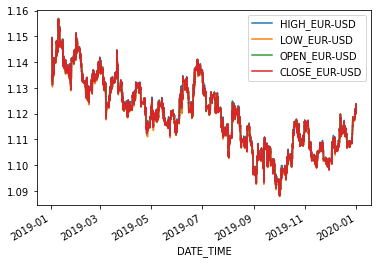

In [3]:
forex_pairs[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

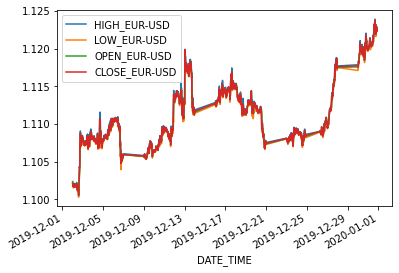

In [4]:
forex_pairs_sample[['HIGH_EUR-USD','LOW_EUR-USD', 'OPEN_EUR-USD', 'CLOSE_EUR-USD']].plot()

<ipython-input-5-491a0bb02d77>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  first_plt = sm.tsa.seasonal_decompose(forex_pairs_sample["CLOSE_EUR-USD"], freq= 480)


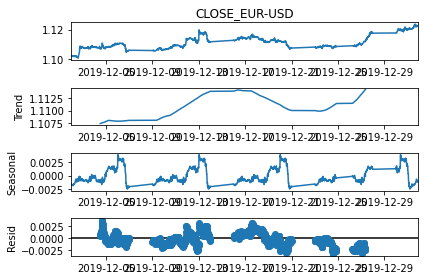

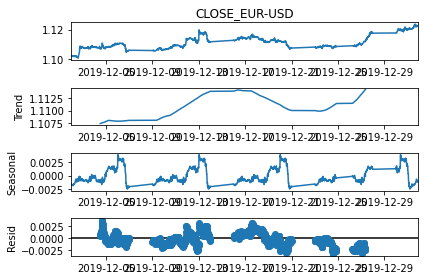

In [5]:
first_plt = sm.tsa.seasonal_decompose(forex_pairs_sample["CLOSE_EUR-USD"], freq= 480)
first_plt.plot()

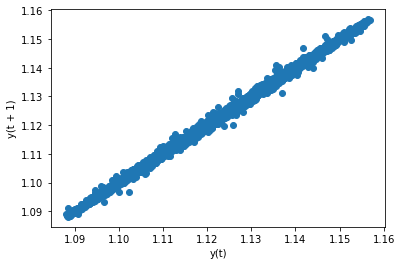

In [6]:
pd.plotting.lag_plot(forex_pairs['CLOSE_EUR-USD'])

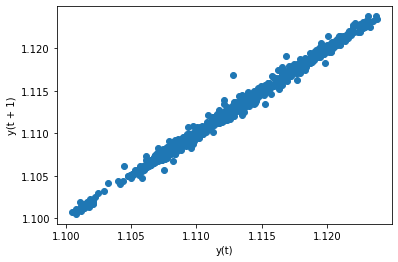

In [7]:
pd.plotting.lag_plot(forex_pairs_sample['CLOSE_EUR-USD'])

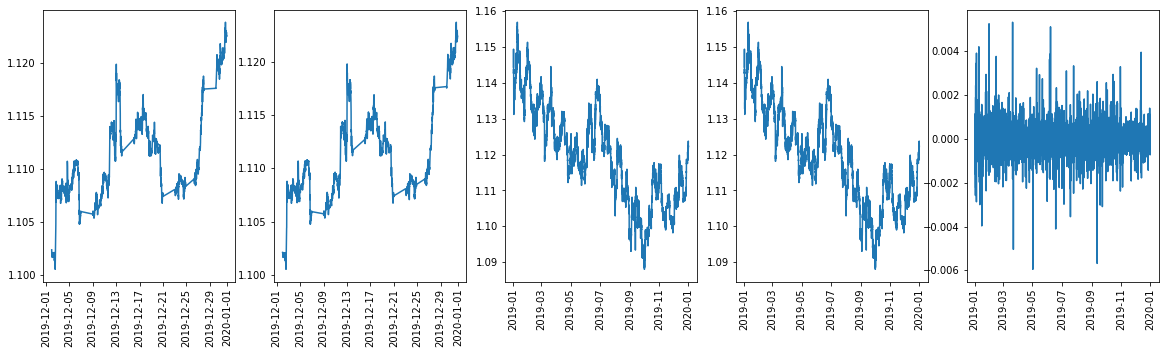

In [8]:


plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.plot(forex_pairs_sample[["OPEN_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,2)
plt.plot(forex_pairs_sample[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,3)
plt.plot(forex_pairs[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,4)
plt.plot(forex_pairs[["CLOSE_EUR-USD"]])
plt.xticks(rotation=90)
plt.subplot(1,5,5)
plt.plot(forex_pairs[["DIFF_EUR-USD"]])
plt.xticks(rotation=90)

#plt.xticks(range(0,168,7),list(m),rotation=90)
plt.show()

In [9]:
#Case all 2019
#stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

#[(col,stationaryCheck(forex_pairs[col])) for col in forex_pairs.columns]
stationary_or_not(forex_pairs_sample)

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('DIFF_EUR-USD', 'Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('DIFF_EUR-JPY', 'Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('DIFF_USD-JPY', 'Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('DIFF_EUR-CHF', 'Stationary'),
 ('HIGH_USD-CAD', 'Not-Stationary'),
 ('LOW_USD-CAD', 'Not-Stationary'),
 ('OPEN_USD-CAD', 'Not-Stationary'),
 ('CLOSE_USD-CAD', 'Not-Stationary'),
 ('DIFF_USD-CAD', 'Stationary'),
 ('HIGH_USD-CHF', 'Not-Stationary'),
 ('LOW_USD-CHF', 'Not-Stationary'),
 ('OPEN_USD-CHF', 'Not

In [10]:
#Case December
stationary_or_not(forex_pairs)

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('DIFF_EUR-USD', 'Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('DIFF_EUR-JPY', 'Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('DIFF_USD-JPY', 'Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('DIFF_EUR-CHF', 'Stationary'),
 ('HIGH_USD-CAD', 'Stationary'),
 ('LOW_USD-CAD', 'Stationary'),
 ('OPEN_USD-CAD', 'Stationary'),
 ('CLOSE_USD-CAD', 'Stationary'),
 ('DIFF_USD-CAD', 'Stationary'),
 ('HIGH_USD-CHF', 'Not-Stationary'),
 ('LOW_USD-CHF', 'Not-Stationary'),
 ('OPEN_USD-CHF', 'Not-Stationary'),
 

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

In [11]:
scal = MinMaxScaler()
scaled = pd.DataFrame(scal.fit_transform(forex_pairs_sample), columns=forex_pairs_sample.columns)

In [12]:
scaled
#I use this scale to get the Japanese values in a range nearby the rest, useful?

,HIGH_EUR-USD,LOW_EUR-USD,OPEN_EUR-USD,CLOSE_EUR-USD,DIFF_EUR-USD,HIGH_EUR-JPY,LOW_EUR-JPY,OPEN_EUR-JPY,CLOSE_EUR-JPY,DIFF_EUR-JPY,...,HIGH_USD-CHF,LOW_USD-CHF,OPEN_USD-CHF,CLOSE_USD-CHF,DIFF_USD-CHF,HIGH_AUD-USD,LOW_AUD-USD,OPEN_AUD-USD,CLOSE_AUD-USD,DIFF_AUD-USD
0,0.067100,0.077022,0.078970,0.067899,0.272884,0.269509,0.269525,0.269466,0.264784,0.296373,...,0.976848,0.978381,0.977469,0.979694,0.618574,0.009756,0.006372,0.019695,0.005944,0.328605
1,0.057576,0.070998,0.063519,0.066180,0.328152,0.265322,0.254211,0.264122,0.249905,0.270466,...,0.977964,0.979490,0.980529,0.977747,0.588723,0.001876,0.008996,0.005574,0.011144,0.451537
2,0.056277,0.075731,0.066094,0.068328,0.326425,0.249715,0.251914,0.249618,0.251431,0.313990,...,0.977964,0.977827,0.978025,0.978860,0.610282,0.004128,0.010870,0.010777,0.010030,0.411348
3,0.056710,0.077022,0.068240,0.067039,0.312608,0.258089,0.259571,0.251145,0.258680,0.329534,...,0.976569,0.975610,0.978860,0.974409,0.578773,0.007505,0.008996,0.009662,0.008172,0.406619
4,0.057143,0.066265,0.067811,0.056725,0.272884,0.258089,0.252680,0.259160,0.259443,0.309845,...,0.982148,0.975887,0.974409,0.984701,0.666667,0.008630,0.009370,0.007804,0.016345,0.470449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.957576,0.948365,0.945494,0.961753,0.378238,0.739627,0.745789,0.736641,0.741320,0.322280,...,0.061925,0.048503,0.067316,0.044506,0.469320,0.987992,0.982009,0.986622,0.971397,0.321513
1964,0.955844,0.953959,0.959657,0.944134,0.250432,0.740388,0.747703,0.741221,0.737123,0.298446,...,0.050488,0.048503,0.043394,0.050626,0.648425,0.974109,0.979385,0.971386,0.968425,0.399527
1965,0.939394,0.950086,0.942918,0.941985,0.309154,0.740769,0.743492,0.737786,0.740939,0.318135,...,0.059414,0.055710,0.050626,0.062031,0.673300,0.967730,0.969265,0.968042,0.964339,0.394799
1966,0.939827,0.944923,0.941202,0.945423,0.329879,0.742292,0.747703,0.740840,0.746662,0.325389,...,0.061925,0.066796,0.061752,0.062309,0.608624,0.963977,0.961769,0.964326,0.957281,0.373522


In [13]:
stationary_or_not(scaled)

[('HIGH_EUR-USD', 'Not-Stationary'),
 ('LOW_EUR-USD', 'Not-Stationary'),
 ('OPEN_EUR-USD', 'Not-Stationary'),
 ('CLOSE_EUR-USD', 'Not-Stationary'),
 ('DIFF_EUR-USD', 'Stationary'),
 ('HIGH_EUR-JPY', 'Not-Stationary'),
 ('LOW_EUR-JPY', 'Not-Stationary'),
 ('OPEN_EUR-JPY', 'Not-Stationary'),
 ('CLOSE_EUR-JPY', 'Not-Stationary'),
 ('DIFF_EUR-JPY', 'Stationary'),
 ('HIGH_USD-JPY', 'Not-Stationary'),
 ('LOW_USD-JPY', 'Not-Stationary'),
 ('OPEN_USD-JPY', 'Not-Stationary'),
 ('CLOSE_USD-JPY', 'Not-Stationary'),
 ('DIFF_USD-JPY', 'Stationary'),
 ('HIGH_EUR-CHF', 'Not-Stationary'),
 ('LOW_EUR-CHF', 'Not-Stationary'),
 ('OPEN_EUR-CHF', 'Not-Stationary'),
 ('CLOSE_EUR-CHF', 'Not-Stationary'),
 ('DIFF_EUR-CHF', 'Stationary'),
 ('HIGH_USD-CAD', 'Not-Stationary'),
 ('LOW_USD-CAD', 'Not-Stationary'),
 ('OPEN_USD-CAD', 'Not-Stationary'),
 ('CLOSE_USD-CAD', 'Not-Stationary'),
 ('DIFF_USD-CAD', 'Stationary'),
 ('HIGH_USD-CHF', 'Not-Stationary'),
 ('LOW_USD-CHF', 'Not-Stationary'),
 ('OPEN_USD-CHF', 'Not

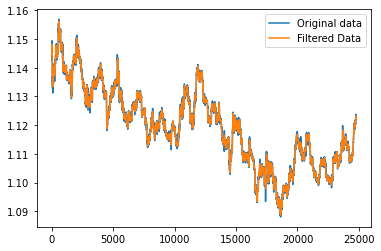

In [14]:
from scipy import signal

data_close = forex_pairs['CLOSE_EUR-USD']

b, a = signal.butter(3, 1/10)
filtrd_data_close = signal.filtfilt(b, a, data_close)

plt.plot(data_close.to_numpy())
plt.plot(filtrd_data_close)
plt.legend(["Original data","Filtered Data"])

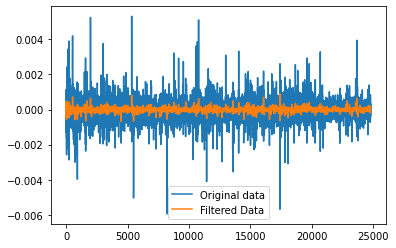

In [15]:
data_diff = forex_pairs['DIFF_EUR-USD']

b, a = signal.butter(3, 1/10)
filtrd_data_diff = signal.filtfilt(b, a, data_diff)

plt.plot(data_diff.to_numpy())
plt.plot(filtrd_data_diff)
plt.legend(["Original data","Filtered Data"])

In [16]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [17]:
df = pd.DataFrame({
    "X":data_diff.to_numpy(),
    "Xf": filtrd_data_diff
},index=forex_pairs.index)

In [18]:
print(forex_pairs_sample.shape, forex_pairs.shape)
df

(1968, 35) (24776, 35)


,X,Xf
DATE_TIME,,
2019-01-02 06:00:00,-0.00014,-0.000098
2019-01-02 06:15:00,0.00002,0.000050
2019-01-02 06:30:00,0.00017,0.000187
2019-01-02 06:45:00,-0.00009,0.000304
2019-01-02 07:00:00,0.00031,0.000394
...,...,...
2019-12-31 19:45:00,0.00035,-0.000033
2019-12-31 20:00:00,-0.00039,-0.000066
2019-12-31 20:15:00,-0.00005,-0.000105


In [19]:
dr = df.index
print(dr, dr.shape)
realidad = df.loc[dr[:22808]]
futuro = df.loc[dr[22808:]]

DatetimeIndex(['2019-01-02 06:00:00', '2019-01-02 06:15:00',
               '2019-01-02 06:30:00', '2019-01-02 06:45:00',
               '2019-01-02 07:00:00', '2019-01-02 07:15:00',
               '2019-01-02 07:30:00', '2019-01-02 07:45:00',
               '2019-01-02 08:00:00', '2019-01-02 08:15:00',
               ...
               '2019-12-31 18:30:00', '2019-12-31 18:45:00',
               '2019-12-31 19:00:00', '2019-12-31 19:15:00',
               '2019-12-31 19:30:00', '2019-12-31 19:45:00',
               '2019-12-31 20:00:00', '2019-12-31 20:15:00',
               '2019-12-31 20:30:00', '2019-12-31 20:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=24776, freq=None) (24776,)


In [20]:
predictions_AR = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]

    # Entrena el modelo AR
    model_AR = AR(train)
    print(f"Entrenando con los datos desde la serie {col}")
    model_fit_AR = model_AR.fit(maxlag=10)
    
     # Predice los valores AR
    predictions_AR[col] = model_fit_AR.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
      
pred_AR = pd.DataFrame(predictions_AR)
pred_AR['timing'] = futuro.index
pred_AR.index = pd.DatetimeIndex(pred_AR.timing)
pred_AR = pred_AR.drop(columns={'timing'})
pred_AR

Entrenando con los datos desde la serie X
Entrenando con los datos desde la serie Xf


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)

,X,Xf
timing,,
2019-12-02 00:00:00,-0.000005,-0.000002
2019-12-02 00:15:00,-0.000001,-0.000008
2019-12-02 00:30:00,-0.000004,-0.000014
2019-12-02 00:45:00,-0.000003,-0.000019
2019-12-02 01:00:00,-0.000003,-0.000023
...,...,...
2019-12-31 19:45:00,-0.000001,-0.000001
2019-12-31 20:00:00,-0.000001,-0.000001
2019-12-31 20:15:00,-0.000001,-0.000001


In [26]:
predictions_ARIMA = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]

    # Entrena el modelo AR
    model_ARIMA = ARIMA(train, order=(0,0,1))
    print(f"Entrenando con los datos desde la serie {col}")
    model_fit_ARIMA = model_ARIMA.fit(maxlag=10)
    
     # Predice los valores AR
    predictions_ARIMA[col] = model_fit_ARIMA.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
      
pred_ARIMA = pd.DataFrame(predictions_ARIMA)
pred_ARIMA['timing'] = futuro.index
pred_ARIMA.index = pd.DatetimeIndex(pred_ARIMA.timing)
pred_ARIMA = pred_ARIMA.drop(columns={'timing'})
pred_ARIMA

/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Entrenando con los datos desde la serie X


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Entrenando con los datos desde la serie Xf


/home/pablo/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,X,Xf
timing,,
2019-12-02 00:00:00,-0.000003,2.104850e-07
2019-12-02 00:15:00,-0.000001,-1.283336e-06
2019-12-02 00:30:00,-0.000001,-1.283336e-06
2019-12-02 00:45:00,-0.000001,-1.283336e-06
2019-12-02 01:00:00,-0.000001,-1.283336e-06
...,...,...
2019-12-31 19:45:00,-0.000001,-1.283336e-06
2019-12-31 20:00:00,-0.000001,-1.283336e-06
2019-12-31 20:15:00,-0.000001,-1.283336e-06


In [28]:
from sklearn.metrics import mean_squared_error

# squared => If True returns MSE value, if False returns RMSE value.
for col in pred_AR.columns:
    mse = mean_squared_error(futuro[col], pred_AR[col])
    rmse = np.sqrt(mse)
    print(f"AR Model {col} ->  MSE={mse} RMSE={rmse}")

AR Model X ->  MSE=9.962828141370121e-08 RMSE=0.0003156394801251916
AR Model Xf ->  MSE=1.0503478580027648e-08 RMSE=0.00010248647998652139


In [29]:
for col in pred_ARIMA.columns:
    mse = mean_squared_error(futuro[col], pred_ARIMA[col])
    rmse = np.sqrt(mse)
    print(f"ARIMA Model {col} ->  MSE={mse} RMSE={rmse}")

ARIMA Model X ->  MSE=9.962538472550169e-08 RMSE=0.0003156348914893626
ARIMA Model Xf ->  MSE=1.0486151047643005e-08 RMSE=0.00010240190939451767


### LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense, Flatten